## Classification results

This notebook contains functions to measure the performance of a classifier applied over a set of annotations.

The output of the classification files is expected to be compatible with the output of LasagneNLP classifiers. Each line contains the true and predicted label of one classification example, in that order:

`_ I-Premise:2:Support I-Premise:-1:Support`

In [48]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import sklearn

import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

import show_metrics

In [49]:
def read_classification(filename):
    result = pandas.read_csv(filename, delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2])
    return result

In [50]:
def extract_component_label(full_label):
    """Given a full label, extracts the component classification label"""
    if len(full_label) == 1:
        return full_label
    return full_label.split('-')[1].split(':')[0].lower()

In [51]:
classification = read_classification(
    '/home/mteruel/am/results/bi-lstm-cnn/components_paragraphs/final_test_run4')

In [52]:
classification['true_component'] = classification['true'].apply(extract_component_label)
classification['predicted_component'] = classification['prediction'].apply(extract_component_label)

In [53]:
classification.true_component.unique()

array(['O', 'premise', 'claim', 'major'], dtype=object)

In [54]:
print(sklearn.metrics.classification_report(classification.true_component, classification.predicted_component))

             precision    recall  f1-score   support

          O       0.77      0.62      0.69      1202
      claim       0.25      0.64      0.36       243
      major       0.00      0.00      0.00        69
    premise       0.45      0.39      0.42       579

avg / total       0.60      0.54      0.55      2093



/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Observed Agreement: 53.85%


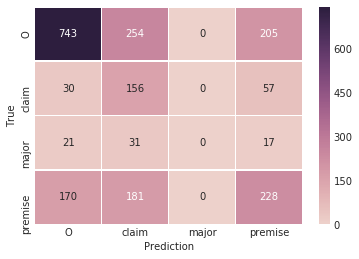

0.538461538462


In [55]:
show_metrics.show_confusion_matrix(classification.true_component, classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(classification.true_component, classification.predicted_component))

## Evaluation with reduced labels (premise - claim)

In [56]:
def extract_simple_component_label(full_label):
    """Given a full label, extracts the component classification label"""
    if full_label == "major":
        return 'claim'
    return full_label

In [57]:
print(sklearn.metrics.classification_report(
    classification.true_component.apply(extract_simple_component_label),
    classification.predicted_component.apply(extract_simple_component_label)))

             precision    recall  f1-score   support

          O       0.77      0.62      0.69      1202
      claim       0.30      0.60      0.40       312
    premise       0.45      0.39      0.42       579

avg / total       0.61      0.55      0.57      2093



Observed Agreement: 55.33%


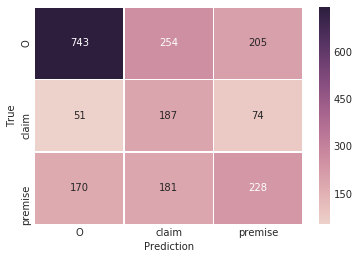

0.553272814142


In [58]:
show_metrics.show_confusion_matrix(
    classification.true_component.apply(extract_simple_component_label),
    classification.predicted_component.apply(extract_simple_component_label), 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(
    classification.true_component.apply(extract_simple_component_label),
    classification.predicted_component.apply(extract_simple_component_label)))

## Training evaluations

In [17]:
import re
def read_learning_metrics(filename):
    result = pandas.DataFrame(columns=['Epoch', 'Learning Rate', 'Loss', 'Accuracy', 'Partition'])
    with open(filename, 'r') as metrics_file:
        learning_rate_re = re.compile("learning rate=(.*),")
        loss_re = re.compile("loss: (.*?), (corr|acc)")
        accuracy_re = re.compile("acc: (.*?)%")
        row = {}
        last_epoch = 0
        for line in metrics_file:
            if line.startswith('Epoch'):
                last_epoch = int(line.split(' ')[1])
                learning_rate = float(learning_rate_re.search(line).group(1))
            elif line.startswith('dev') or line.startswith('train') or line.startswith('test loss'):
                row['Loss'] = float(loss_re.search(line).group(1))
                row['Accuracy'] = float(accuracy_re.search(line).group(1))
                if line.startswith('dev loss'):
                    row['Partition'] = 'Validation'
                elif line.startswith('train'):
                    row['Partition'] = 'Train'
                elif line.startswith('test loss'):
                    row['Partition'] = 'Test'
                row['Epoch'] = last_epoch  # epoch
                row['Learning Rate'] = learning_rate
                result.loc[len(result)] = row
                row = {}
    return result

In [59]:
log_file = '8672'
learning_metrics = read_learning_metrics('/home/mteruel/am/slurm-scripts/logs/{}.out'.format(log_file))

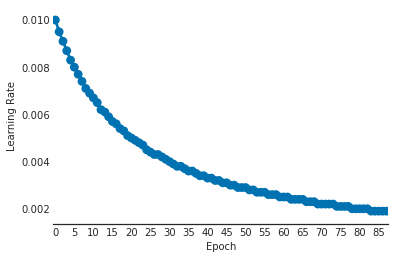

In [60]:
ax = sns.pointplot(x="Epoch", y="Learning Rate", data=learning_metrics)
ax.set_xticklabels([("{}".format(x) if x % 5 is 0 else '') for x in range(int(numpy.max(learning_metrics.Epoch)))])
sns.despine(left=True)

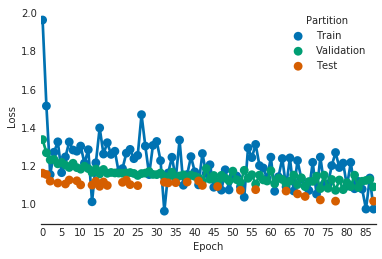

In [61]:
ax = sns.pointplot(x="Epoch", y="Loss", hue='Partition', data=learning_metrics)
ax.set_xticklabels([("{}".format(x) if x % 5 is 0 else '') for x in range(int(numpy.max(learning_metrics.Epoch)))])
sns.despine(left=True)

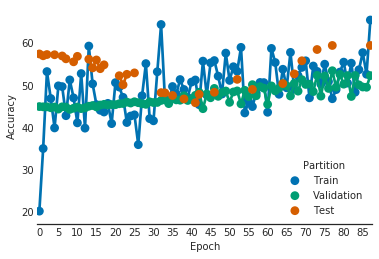

In [62]:
ax = sns.pointplot(x="Epoch", y="Accuracy", hue='Partition', data=learning_metrics)
ax.set_xticklabels([("{}".format(x) if x % 5 is 0 else '') for x in range(int(numpy.max(learning_metrics.Epoch))) ])
sns.despine(left=True)

In [34]:
test_labels = pandas.read_csv('~/am/data/echr/annotation/holdout/proc_components_paragraph.conll',
                              sep='\t', usecols=)
prediction_labels = read_classification(
    '/home/mteruel/am/results/bi-lstm-cnn/components_paragraphs/final_test_run2')